https://www.kaggle.com/rmisra/news-category-dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud, STOPWORDS

In [3]:
import nltk, re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
import pickle

In [5]:
from tqdm.auto import tqdm
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [6]:
pd.options.display.max_colwidth = -1

## Import Data

In [7]:
data = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [8]:
data.shape

(200853, 6)

In [9]:
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89,She left her husband. He killed their children. Just another day in America.,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Andy McDonald,https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carrey-adam-schiff-democrats_us_5b0950e8e4b0fdb2aa53e675,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-margulies-trump-poop-bag_us_5b093ec2e4b0fdb2aa53df70,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",2018-05-26


## EDA

### Dropping Irrelvant Data

In [10]:
data = data.drop(['authors', 'date', 'link'], axis=1)

In [11]:
data.head()

,category,headline,short_description
0,CRIME,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",She left her husband. He killed their children. Just another day in America.
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""


### News Categories and their counts

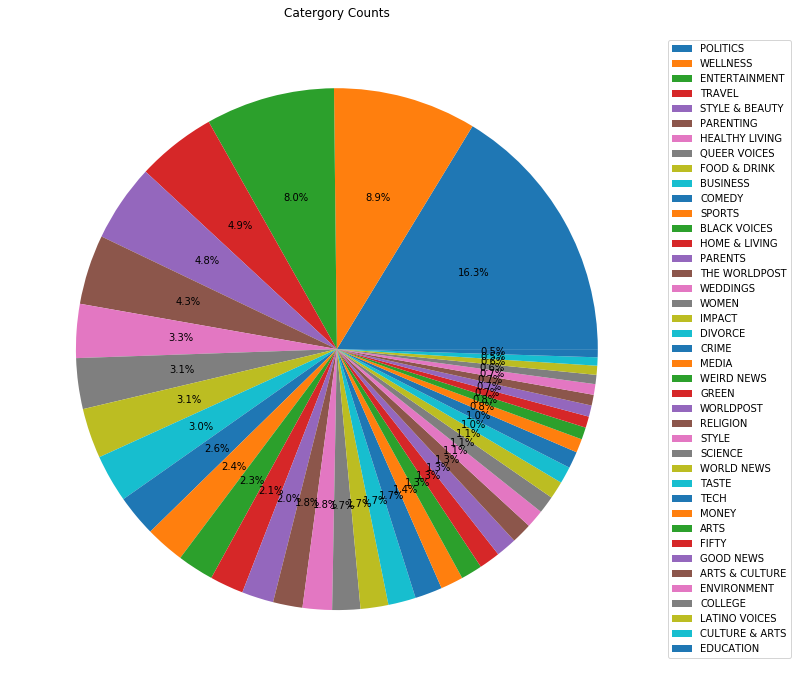

In [12]:
plotdata = data['category'].value_counts()

fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

ax.pie(plotdata, autopct='%1.1f%%')

ax.legend(plotdata.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Catergory Counts")

plt.show()

### Generalising the categories

In [13]:
print(plotdata.index,len(plotdata.index))

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING',
       'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'IMPACT', 'DIVORCE',
       'CRIME', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST', 'RELIGION',
       'STYLE', 'SCIENCE', 'WORLD NEWS', 'TASTE', 'TECH', 'MONEY', 'ARTS',
       'FIFTY', 'GOOD NEWS', 'ARTS & CULTURE', 'ENVIRONMENT', 'COLLEGE',
       'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION'],
      dtype='object') 41


In [14]:
def generalize(x):
    if x in ['BUSINESS', 'MONEY']:
        return 'BUSINESS'
    if x in ['SCIENCE', 'TECH', 'ARTS', 'ARTS & CULTURE', 'COLLEGE', 'CULTURE & ARTS', 'EDUCATION']:
        return 'EDUCATION'
    if x in ['WELLNESS', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'HOME & LIVING', 'FOOD & DRINK', 'PARENTS', 'WEDDINGS', 'WOMEN', 'DIVORCE', 'RELIGION', 'STYLE', 'TASTE', 'FIFTY']:
        return 'LIFESTYLE'
    if x in ['QUEER VOICES', 'BLACK VOICES', 'THE WORLDPOST', 'WORLDPOST', 'WORLD NEWS', 'LATINO VOICES', 'IMPACT', 'MEDIA']:
        return 'GLOBAL'
    if x in ['COMEDY', 'CRIME', 'WEIRD NEWS', 'GREEN', 'GOOD NEWS', 'ENVIRONMENT']:
        return 'MISCELLANEOUS'
    else:
        return x

In [15]:
data['category'] = data['category'].progress_apply(generalize)

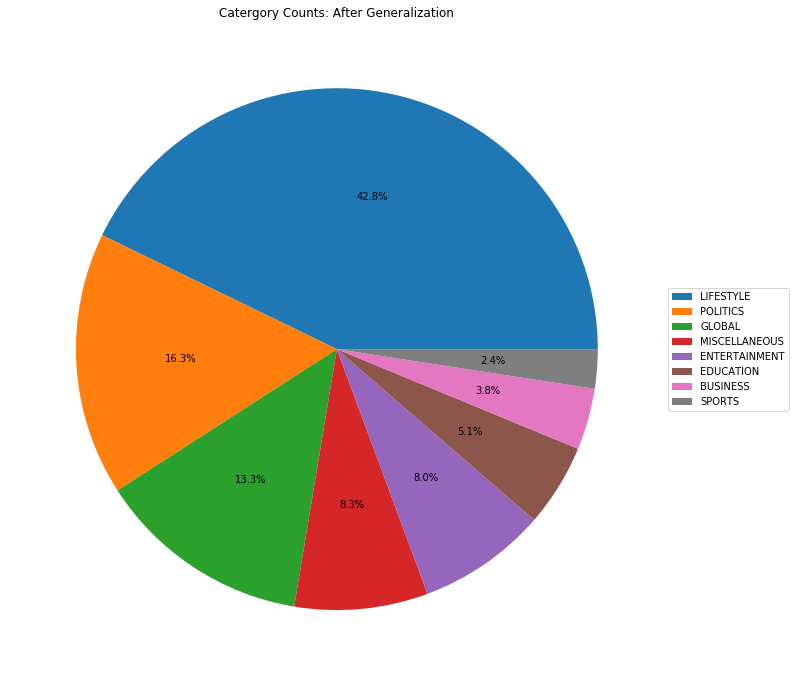

In [16]:
plotdata = data['category'].value_counts()

fig, ax = plt.subplots(figsize=(12,12), subplot_kw=dict(aspect="equal"))

ax.pie(plotdata, autopct='%1.1f%%')

ax.legend(plotdata.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Catergory Counts: After Generalization")

plt.show()

In [17]:
labels = ['LIFESTYLE', 'POLITICS', 'GLOBAL', 'MISCELLANEOUS', 'ENTERTAINMENT', 'EDUCATION', 
                         'BUSINESS', 'SPORTS']

### Visualizing most common words

In [18]:
data['article'] = data['headline'] + ' ' + data['short_description']

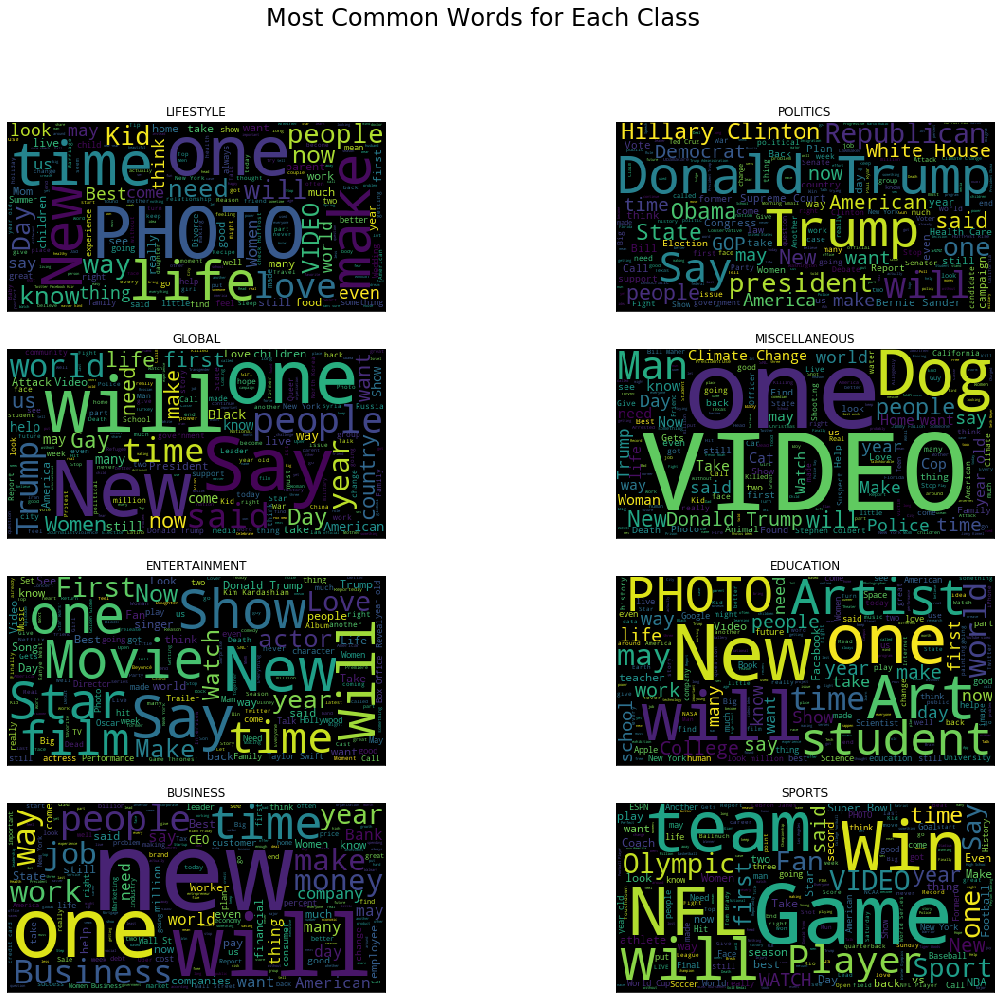

In [19]:
axes = []
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Most Common Words for Each Class', fontsize=24)
for i in range(8):
    axes.append(plt.subplot2grid((4, 2), (i//2, i%2)))
    
for i, col in enumerate(labels):
    axes[i].imshow(WordCloud().generate_from_text(' '.join(data[data['category'] == col]['article'].values)))
    axes[i].set_title(col)
    axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)

### Text Cleaning

In [20]:
import nltk, re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def spell_correct(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\0s", "0", text)    
    return text

def remove_url(text):
    URL_REGEX = re.compile(r'''((http[s]?://)[^ <>'"{}|\\^`[\]]*)''')
    return URL_REGEX.sub(r' ', text)

remove_punc = lambda x : re.sub(r"\W", ' ', x)

remove_num = lambda x : re.sub(r"\d", ' ', x)

remove_extra_spaces = lambda x : re.sub(r"\s+", ' ', x)

lower_case = lambda x : x.lower()

with open('stopwords.txt') as f:
    sw = map(lambda x : x.strip(), f.readlines())
stop_words = set(nltk.corpus.stopwords.words('english'))|set(sw)
remove_stopwords = lambda x: ' '.join(word for word in x.split() if word not in stop_words)

ps = PorterStemmer()
ps_stem = lambda x: ' '.join(ps.stem(word) for word in x.split())

wnl = WordNetLemmatizer()
wnl_lemmatize = lambda x: ' '.join(wnl.lemmatize(word) for word in x.split())

def tag_pos(x):
    tag_list =  nltk.pos_tag(nltk.word_tokenize(x))
    pos = ""
    for t in tag_list:
        pos += t[0] +'(' + t[1] +')' + ' '
    return pos

def cleanText(x, rsw, stm, lem, tgps):
    x = str(x)
    x = remove_url(x)
    x = lower_case(x)
    x = spell_correct(x)
    x = remove_punc(x)
    x = remove_num(x)
    x = remove_extra_spaces(x)
    
    if rsw:
        x = remove_stopwords(x)
    if stm:
        x = ps_stem(x)
    if lem:
        x = wnl_lemmatize(x)
    if tgps:
        x = tag_pos(x)
    return x

In [21]:
data['article_clean'] = data['article'].progress_apply(lambda x : cleanText(x, True, False, False, False))

In [22]:
data.head()

,category,headline,short_description,article,article_clean
0,MISCELLANEOUS,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",She left her husband. He killed their children. Just another day in America.,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.",mass shootings texas week tv left husband killed children day america
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a song.,smith joins diplo nicky jam world cup official song course song
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,Hugh Grant Marries For The First Time At Age 57 The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.,hugh grant marries time age actor longtime girlfriend anna eberstein tied knot civil ceremony
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.,jim carrey blasts castrato adam schiff democrats new artwork actor gives dems ass kicking fighting hard donald trump
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""","Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment.""",julianna margulies uses donald trump poop bags pick dog dietland actress said using bags really cathartic therapeutic moment


## TFIDF Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [24]:
vectorizer = TfidfVectorizer()
vectorizer.fit(data['article_clean'])
X = vectorizer.transform(data['article_clean'])

In [25]:
encoder = LabelEncoder()
encoder.fit(data['category'])
y = encoder.transform(data['category'])

In [26]:
encoder.classes_

array(['BUSINESS', 'EDUCATION', 'ENTERTAINMENT', 'GLOBAL', 'LIFESTYLE',
       'MISCELLANEOUS', 'POLITICS', 'SPORTS'], dtype=object)

In [27]:
print("X shape:", X.shape, "Y shape: ", y.shape)

X shape: (200853, 85398) Y shape:  (200853,)


## Machine Learing

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [29]:
from utils import train_model

### Baseline

Mean Hamming Loss 0.7549 +- 0.0033


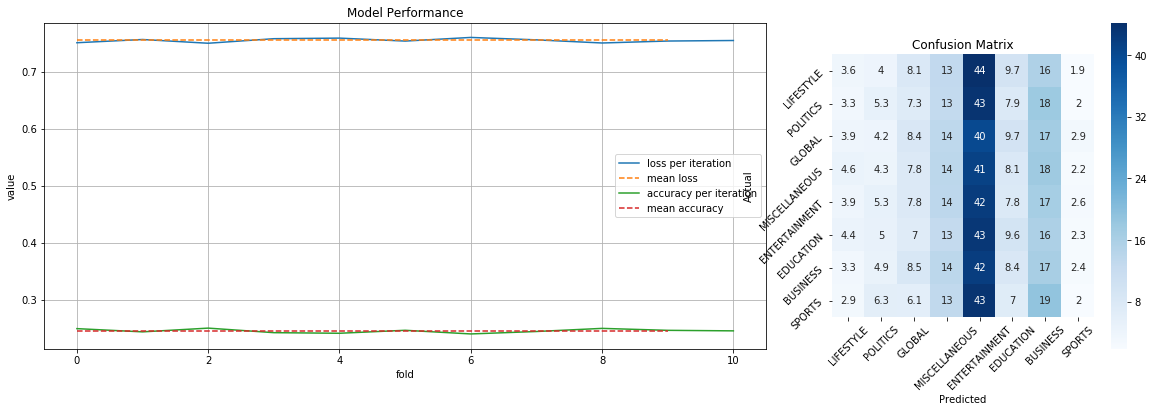

In [30]:
model = DummyClassifier(strategy='stratified', random_state=101)
performance, cm, model = train_model(model, X, y, labels)
print('Mean Hamming Loss', round(np.mean(performance['loss']), 4), '+-', round(np.std(performance['loss']), 4))

### Multinomial NB

Mean Hamming Loss 0.3644 +- 0.003


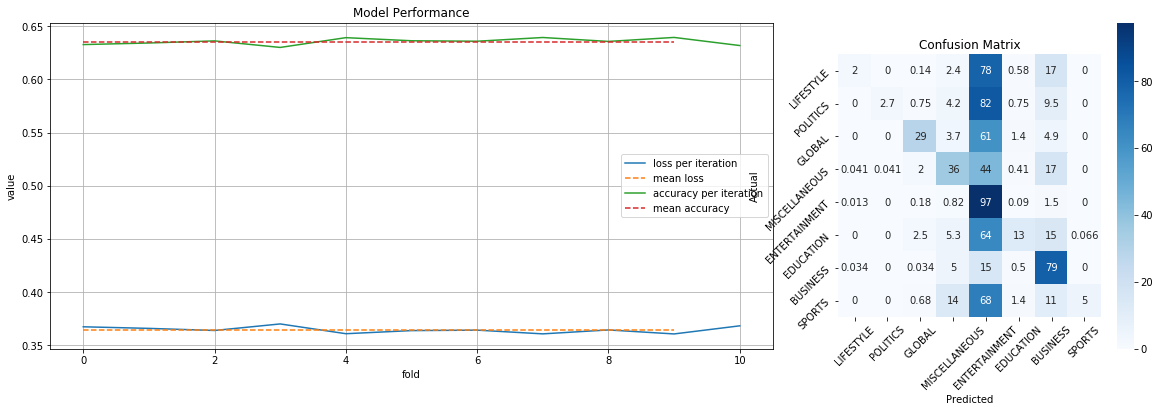

In [31]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model(model, X, y, labels)
print('Mean Hamming Loss', round(np.mean(mnb_performance['loss']), 4), '+-', round(np.std(mnb_performance['loss']), 4))

### Logistic Regression

Mean Hamming Loss 0.2676 +- 0.003


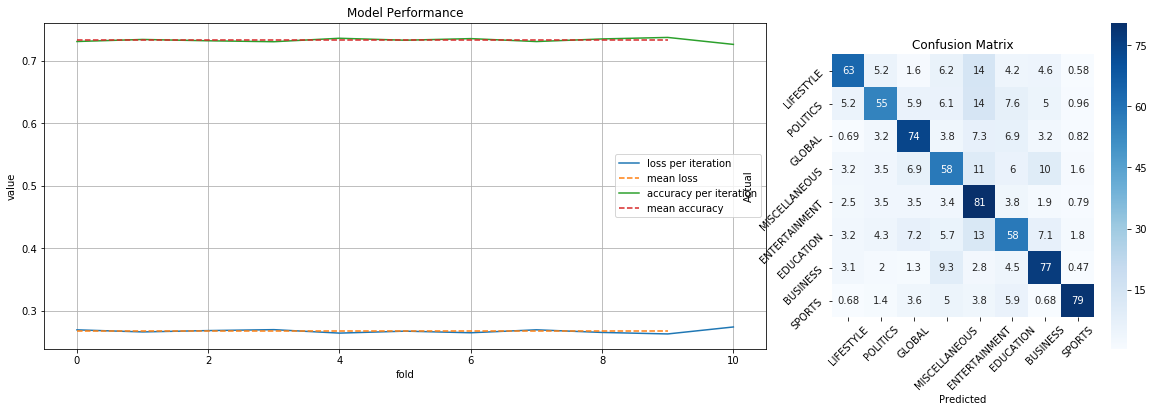

In [32]:
model = LogisticRegression(class_weight='balanced', random_state=101, solver='lbfgs', max_iter=1_000,
                           multi_class='ovr', warm_start=True)
lr_performance, lr_cm, lr_model = train_model(model, X, y, labels)
print('Mean Hamming Loss', round(np.mean(lr_performance['loss']), 4), '+-', round(np.std(lr_performance['loss']), 4))

## Over Sampling

In [33]:
data['category'].value_counts() .max() / data['category'].value_counts() 

LIFESTYLE        1.000000 
POLITICS         2.626348 
GLOBAL           3.224602 
MISCELLANEOUS    5.181944 
ENTERTAINMENT    5.354590 
EDUCATION        8.359323 
BUSINESS         11.248561
SPORTS           17.605242
Name: category, dtype: float64

In [34]:
data_over = pd.concat([
    data[data['category'] == 'LIFESTYLE'],
    data[data['category'] == 'POLITICS'].sample(frac=0.62),
    data[data['category'] == 'GLOBAL'].sample(frac=0.22),    
    data[data['category'] == 'MISCELLANEOUS'].sample(frac=0.18),
    data[data['category'] == 'ENTERTAINMENT'].sample(frac=0.35),
    data[data['category'] == 'EDUCATION'].sample(frac=0.35),
    data[data['category'] == 'BUSINESS'].sample(frac=0.24),
    data[data['category'] == 'SPORTS'].sample(frac=0.60),
]+
    [data[data['category'] == 'POLITICS']]*2 + 
    [data[data['category'] == 'GLOBAL']]*3 +
    [data[data['category'] == 'MISCELLANEOUS']]*5 + 
    [data[data['category'] == 'ENTERTAINMENT']]*5 + 
    [data[data['category'] == 'EDUCATION']]*8 + 
    [data[data['category'] == 'BUSINESS']]*11 +
    [data[data['category'] == 'SPORTS']]*17
)

In [35]:
data_over['category'].value_counts() .max() / data_over['category'].value_counts() 

LIFESTYLE        1.000000
SPORTS           1.000302
MISCELLANEOUS    1.000372
BUSINESS         1.000757
ENTERTAINMENT    1.000861
EDUCATION        1.001118
GLOBAL           1.001433
POLITICS         1.002425
Name: category, dtype: float64

In [36]:
vectorizer = TfidfVectorizer()
vectorizer.fit(data_over['article_clean'])
X = vectorizer.transform(data_over['article_clean'])

encoder = LabelEncoder()
encoder.fit(data_over['category'])
y = encoder.transform(data_over['category'])

In [37]:
print("X shape:", X.shape, "Y shape: ", y.shape)

X shape: (687248, 85398) Y shape:  (687248,)


Mean Hamming Loss 0.214 +- 0.0017


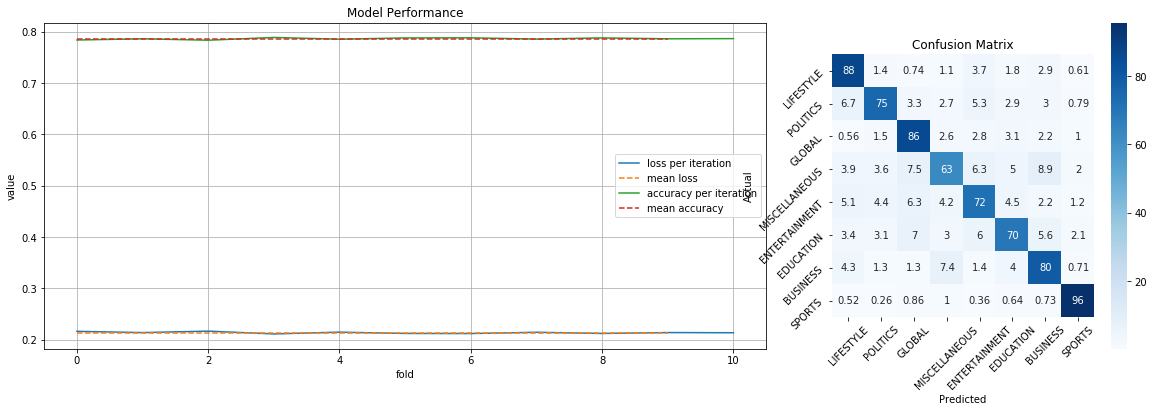

In [38]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model(model, X, y, labels)
print('Mean Hamming Loss', round(np.mean(mnb_performance['loss']), 4), '+-', round(np.std(mnb_performance['loss']), 4))

Mean Hamming Loss 0.154 +- 0.0012


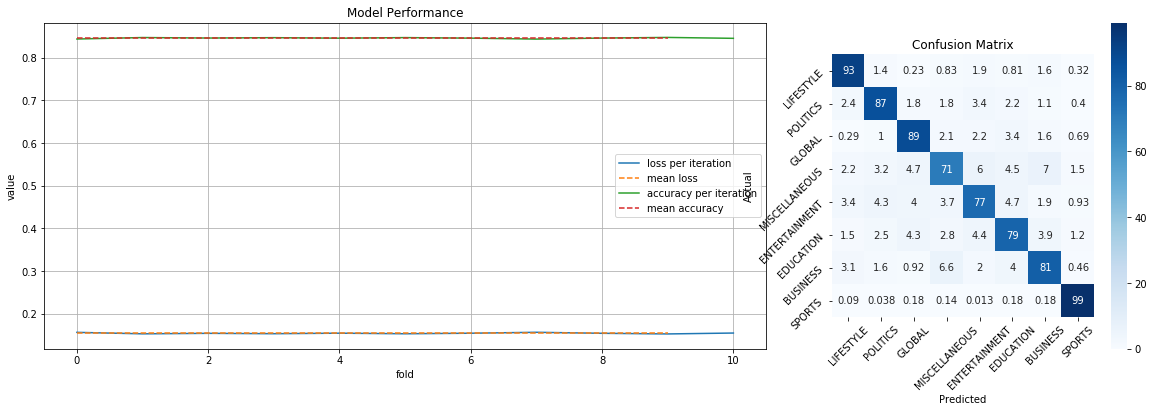

In [39]:
model = LogisticRegression(class_weight='balanced', random_state=101, solver='lbfgs', max_iter=1_000,
                           multi_class='ovr', warm_start=True)
lr_performance, lr_cm, lr_model = train_model(model, X, y, labels)
print('Mean Hamming Loss', round(np.mean(lr_performance['loss']), 4), '+-', round(np.std(lr_performance['loss']), 4))